# <font color = #E55604 size = 10><b> Artificial Neural Network (ANN)<font color = #D21312> VS</font> Convolutional Neural Network (CNN) </b></font>
<font color = #219C90 size = 5> Using both **ANN** and **CNN** on **Digits Mnist dataset** **<font color = #45FFCA>__[https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database)__** </font></font>

![Neural Network](https://www.researchgate.net/profile/Sathiesh-Kumar-4/publication/320746968/figure/fig2/AS:566335681687552@1512036356552/Artificial-Neural-Networks-ANN-and-Convolutional-Neural-Networks-CNN.png)

# <font color = #2F58CD> Artificial Neural Network (ANN) </font>

In [1]:
# !pip install tensorflow

In [47]:
# Importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.layers import LeakyReLU,Conv2D,MaxPooling2D,AveragePooling2D
from keras import regularizers
import time

In [3]:
print(tf.__version__) # Tensorflow version

2.13.0


In [4]:
tf.config.list_physical_devices("GPU") # Finding GPU

[]

In [5]:
tf.config.list_physical_devices("CPU") # Finding CPU

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
# Loading Mnist dataset from tensorflow
mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full) , (x_test, y_test) = mnist.load_data()

In [7]:
# Shape of Mnist dataset
print(x_train_full.shape) # Training data shape
print(x_test.shape)       # Testing data shape

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# There are 60000 image of handwritten digits and each image has resolution 28*28 which is equal to 784 pixels

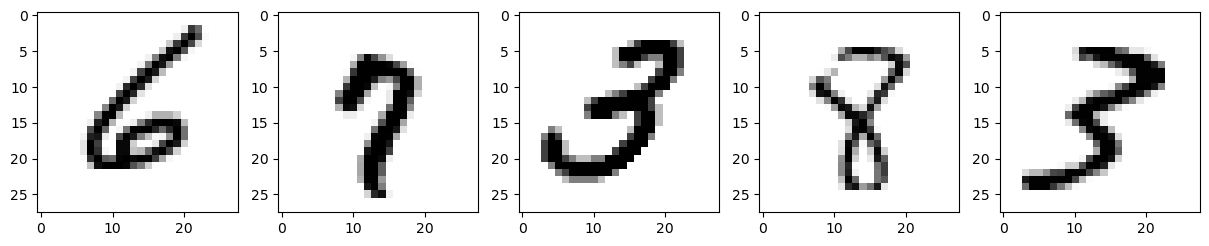

In [9]:
# Here is some example
k = 5
plt.figure(figsize=(15,5))
for i in range(1,k+1):
    plt.subplot(1,k,i)
    idx = int(np.random.randint(0,60000,1))
    plt.imshow(x_train_full[idx], cmap="binary")
plt.show()

In [10]:
x_train_full[0] # Image at "0" index

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train_full[0] # Number at "0" index

5

In [12]:
# Converting the pixels value between 0 to 1
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/255

## <font color = #2F58CD> First **ANN** Network </font>

In [13]:
# Defining the layers
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")
]

model = tf.keras.models.Sequential(LAYERS)

In [14]:
model.summary() # Summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
input_layer = model.layers[0]
input_layer.get_weights()

[]

In [16]:
# Input layer has no weights

In [17]:
hidden1 = model.layers[1]
hidden1.get_weights() # The weights of first hidden layer

[array([[ 0.05054694,  0.05149697,  0.03309961, ...,  0.02394158,
         -0.05443621, -0.0246108 ],
        [-0.03562779,  0.052334  , -0.00815411, ..., -0.05099124,
         -0.03987789,  0.06253996],
        [-0.05267614, -0.00288451, -0.04274706, ..., -0.03713851,
         -0.006381  , -0.04133867],
        ...,
        [-0.00974952, -0.05030172,  0.00722869, ...,  0.04120136,
          0.05719981, -0.03929667],
        [ 0.05011772, -0.07320872,  0.03449158, ...,  0.06320289,
         -0.00371967, -0.04382963],
        [ 0.0317823 , -0.03270683, -0.00461791, ..., -0.02013218,
         -0.06971186,  0.01487658]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
# Defining Loss_function,Optimizer,Metrics and compiling the model
loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=0.001)
METRICS = ["accuracy"]

model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

In [19]:
# Creating a function for saving the logs at proper folder
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("1_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir,filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

In [20]:
# Creating logs callback 
log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

Saving logs at logs/fit/1_log_23_09_26_19_48_02


In [21]:
# Creating early stopping callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

In [22]:
# Saving the model with callback
CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_1.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [23]:
EPOCHS = 50 # Number of Epochs
VALIDATION_SET = (x_valid,y_valid) # Validation data
history = model.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=64, # Training the model
                    callbacks=[tb_cb,early_stopping_cb,checkpoint_cb],use_multiprocessing=True)

Epoch 1/50
860/860 [==============================] - 4s 4ms/step - loss: 2.0446 - accuracy: 0.4097 - val_loss: 1.7333 - val_accuracy: 0.6436
Epoch 2/50
860/860 [==============================] - 3s 4ms/step - loss: 1.4550 - accuracy: 0.7157 - val_loss: 1.1851 - val_accuracy: 0.7628
Epoch 3/50
860/860 [==============================] - 4s 4ms/step - loss: 1.0196 - accuracy: 0.7898 - val_loss: 0.8604 - val_accuracy: 0.8108
Epoch 4/50
860/860 [==============================] - 3s 4ms/step - loss: 0.7823 - accuracy: 0.8234 - val_loss: 0.6892 - val_accuracy: 0.8376
Epoch 5/50
860/860 [==============================] - 3s 4ms/step - loss: 0.6523 - accuracy: 0.8436 - val_loss: 0.5889 - val_accuracy: 0.8564
Epoch 6/50
860/860 [==============================] - 3s 4ms/step - loss: 0.5727 - accuracy: 0.8573 - val_loss: 0.5238 - val_accuracy: 0.8694
Epoch 7/50
860/860 [==============================] - 3s 4ms/step - loss: 0.5191 - accuracy: 0.8671 - val_loss: 0.4781 - val_accuracy: 0.8798
Epoch 

In [24]:
pd.DataFrame(history.history) # All the losses and accuracy in each epoch

,loss,accuracy,val_loss,val_accuracy
0,2.044599,0.409745,1.733334,0.6436
1,1.455023,0.715709,1.185071,0.7628
2,1.019633,0.789800,0.860445,0.8108
3,0.782261,0.823436,0.689154,0.8376
4,0.652308,0.843582,0.588874,0.8564
5,0.572710,0.857255,0.523771,0.8694
6,0.519132,0.867127,0.478128,0.8798
7,0.480602,0.874636,0.444642,0.8860
8,0.451508,0.880273,0.418126,0.8916
9,0.428673,0.884400,0.397529,0.8954


<AxesSubplot: >

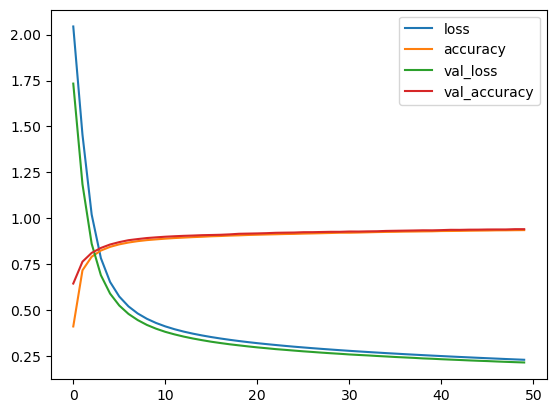

In [25]:
pd.DataFrame(history.history).plot() # Plotting all of the accuracy and losses 

In [26]:
ckpt_model = tf.keras.models.load_model(CKPT_path) # Loading model
ckpt_model.evaluate(x_test,y_test)                 # Evaluating the performance of the model on test data

313/313 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9365


[0.2220998853445053, 0.9365000128746033]

<font color = #B2A4FF size=5> The test accuracy of the first **ANN** model is **93.65 %** </font>

In [27]:
# Predicting the probability of 5 samples randomly
print("Probability of each number for image of testing data:- \n")
for j in range(5):
    idx = np.random.randint(0,10000,1)[0]
    y_prob_lst = ckpt_model.predict(x_test[idx-1:idx]).round(3)[0]
    print("\nNumber : Probability")
    for i in range(10):
        print(i,"     :     ",y_prob_lst[i])
    y_predict = np.argmax(y_prob_lst,axis=-1)
    print("Predicted final output is: ",y_predict,"\n")

Probability of each number for image of testing data:- 

1/1 [==============================] - 0s 105ms/step

Number : Probability
0      :      0.0
1      :      0.0
2      :      0.001
3      :      0.001
4      :      0.05
5      :      0.0
6      :      0.0
7      :      0.007
8      :      0.001
9      :      0.94
Predicted final output is:  9 

1/1 [==============================] - 0s 26ms/step

Number : Probability
0      :      0.289
1      :      0.0
2      :      0.005
3      :      0.0
4      :      0.439
5      :      0.048
6      :      0.035
7      :      0.008
8      :      0.121
9      :      0.054
Predicted final output is:  4 

1/1 [==============================] - 0s 25ms/step

Number : Probability
0      :      0.002
1      :      0.0
2      :      0.002
3      :      0.006
4      :      0.002
5      :      0.697
6      :      0.0
7      :      0.019
8      :      0.026
9      :      0.245
Predicted final output is:  5 

1/1 [==============================] - 0s 

In [28]:
del model
del ckpt_model

## <font color = #2F58CD> Second **ANN** Network </font>

In [29]:
# Added kernel regularization,batch normalization,dropout and leakyrelu activation function 
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=256,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=128,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=64,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=32,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=16,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="softmax"))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                      

In [31]:
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("2_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_2.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

EPOCHS = 50
VALIDATION_SET = (x_valid, y_valid)

loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ["accuracy"]

model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=64,
                    callbacks=[tb_cb, early_stopping_cb, checkpoint_cb],use_multiprocessing=True)

Saving logs at logs/fit/2_log_23_09_26_19_50_51
Epoch 1/50
860/860 [==============================] - 11s 9ms/step - loss: 1.1647 - accuracy: 0.8697 - val_loss: 0.6543 - val_accuracy: 0.9488
Epoch 2/50
860/860 [==============================] - 7s 8ms/step - loss: 0.6878 - accuracy: 0.9233 - val_loss: 0.5432 - val_accuracy: 0.9448
Epoch 3/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5877 - accuracy: 0.9297 - val_loss: 0.4598 - val_accuracy: 0.9600
Epoch 4/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5365 - accuracy: 0.9348 - val_loss: 0.4354 - val_accuracy: 0.9560
Epoch 5/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5017 - accuracy: 0.9392 - val_loss: 0.4121 - val_accuracy: 0.9634
Epoch 6/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4760 - accuracy: 0.9425 - val_loss: 0.4001 - val_accuracy: 0.9640
Epoch 7/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4614 - accuracy: 0.9445

<AxesSubplot: >

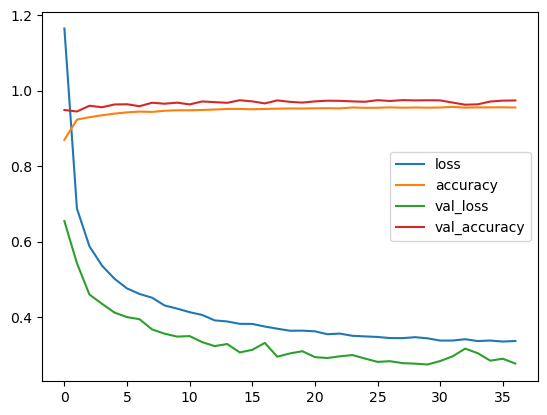

In [32]:
pd.DataFrame(history.history).plot()

In [33]:
ckpt_model = tf.keras.models.load_model(CKPT_path)
ckpt_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2719 - accuracy: 0.9740


[0.27185875177383423, 0.9739999771118164]

<font color = #B2A4FF size=5> The accuracy of the second **ANN** model is **97.40 %** </font>

In [34]:
del model
del ckpt_model

## <font color = #2F58CD> Third **ANN** Network </font>

In [35]:
# Added kernel regularization,batch normalization,dropout,kernel initializer and leakyrelu activation function 
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=256,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=128,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=64,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=32,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=16,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="softmax"))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [37]:
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("3_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_3.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

EPOCHS = 50
VALIDATION_SET = (x_valid, y_valid)

loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001,weight_decay=1e-4) # Weight decay is used here
METRICS = ["accuracy"]

model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=64,
                    callbacks=[tb_cb, early_stopping_cb, checkpoint_cb], use_multiprocessing=True)

Saving logs at logs/fit/3_log_23_09_26_19_55_20
Epoch 1/50
860/860 [==============================] - 11s 9ms/step - loss: 1.3140 - accuracy: 0.8640 - val_loss: 0.7566 - val_accuracy: 0.9488
Epoch 2/50
860/860 [==============================] - 7s 8ms/step - loss: 0.7761 - accuracy: 0.9210 - val_loss: 0.5952 - val_accuracy: 0.9506
Epoch 3/50
860/860 [==============================] - 7s 8ms/step - loss: 0.6420 - accuracy: 0.9304 - val_loss: 0.4907 - val_accuracy: 0.9622
Epoch 4/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5784 - accuracy: 0.9347 - val_loss: 0.4616 - val_accuracy: 0.9600
Epoch 5/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5354 - accuracy: 0.9382 - val_loss: 0.4349 - val_accuracy: 0.9650
Epoch 6/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5069 - accuracy: 0.9418 - val_loss: 0.4030 - val_accuracy: 0.9680
Epoch 7/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4922 - accuracy: 0.9414

<AxesSubplot: >

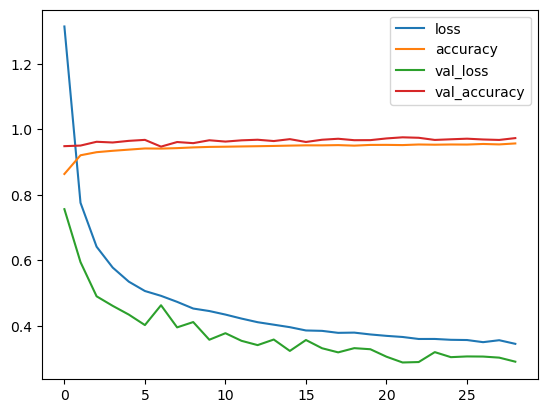

In [38]:
pd.DataFrame(history.history).plot()

In [39]:
ckpt_model = tf.keras.models.load_model(CKPT_path)
ckpt_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.9693


[0.30268532037734985, 0.9692999720573425]

<font color = #B2A4FF size=5> The accuracy of the third **ANN** model is **96.93 %** </font>

In [40]:
del model
del ckpt_model

# <font color = #D80032>**LeNet5** CNN Architecture </font>

# Basic Introduction

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.

### Structure of the LeNet network

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.

![lenet](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/lenet-5.png)


LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons.

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/arch.jpg)

Detailed explanation of each layer parameter:

#### **INPUT Layer**

The first is the data INPUT layer. The size of the input image is uniformly normalized to 32 * 32.

> Note: This layer does not count as the network structure of LeNet-5. Traditionally, the input layer is not considered as one of the network hierarchy.


#### **C1 layer-convolutional layer**

>**Input picture**: 32 * 32

>**Convolution kernel size**: 5 * 5

>**Convolution kernel types**: 6

>**Output featuremap size**: 28 * 28 (32-5 + 1) = 28

>**Number of neurons**: 28 * 28 * 6

>**Trainable parameters**: (5 * 5 + 1) * 6 (5 * 5 = 25 unit parameters and one bias parameter per filter, a total of 6 filters)

>**Number of connections**: (5 * 5 + 1) * 6 * 28 * 28 = 122304

**Detailed description:**

1. The first convolution operation is performed on the input image (using 6 convolution kernels of size 5 * 5) to obtain 6 C1 feature maps (6 feature maps of size 28 * 28, 32-5 + 1 = 28).

2. Let's take a look at how many parameters are needed. The size of the convolution kernel is 5 * 5, and there are 6 * (5 * 5 + 1) = 156 parameters in total, where +1 indicates that a kernel has a bias.

3. For the convolutional layer C1, each pixel in C1 is connected to 5 * 5 pixels and 1 bias in the input image, so there are 156 * 28 * 28 = 122304 connections in total. There are 122,304 connections, but we only need to learn 156 parameters, mainly through weight sharing.


#### **S2 layer-pooling layer (downsampling layer)**

>**Input**: 28 * 28

>**Sampling area**: 2 * 2

>**Sampling method**: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid

>**Sampling type**: 6

>**Output featureMap size**: 14 * 14 (28/2)

>**Number of neurons**: 14 * 14 * 6

>**Trainable parameters**: 2 * 6 (the weight of the sum + the offset)

>**Number of connections**: (2 * 2 + 1) * 6 * 14 * 14

>The size of each feature map in S2 is 1/4 of the size of the feature map in C1.

**Detailed description:**

The pooling operation is followed immediately after the first convolution. Pooling is performed using 2 * 2 kernels, and S2, 6 feature maps of 14 * 14 (28/2 = 14) are obtained.

The pooling layer of S2 is the sum of the pixels in the 2 * 2 area in C1 multiplied by a weight coefficient plus an offset, and then the result is mapped again.

So each pooling core has two training parameters, so there are 2x6 = 12 training parameters, but there are 5x14x14x6 = 5880 connections.

#### **C3 layer-convolutional layer**

>**Input**: all 6 or several feature map combinations in S2

>**Convolution kernel size**: 5 * 5

>**Convolution kernel type**: 16

>**Output featureMap size**: 10 * 10 (14-5 + 1) = 10

>Each feature map in C3 is connected to all 6 or several feature maps in S2, indicating that the feature map of this layer is a different combination of the feature maps extracted from the previous layer.

>One way is that the first 6 feature maps of C3 take 3 adjacent feature map subsets in S2 as input. The next 6 feature maps take 4 subsets of neighboring feature maps in S2 as input. The next three take the non-adjacent 4 feature map subsets as input. The last one takes all the feature maps in S2 as input.

>**The trainable parameters are**: 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) + 1 * (6 * 5 * 5 +1) = 1516

>**Number of connections**: 10 * 10 * 1516 = 151600

**Detailed description:**

After the first pooling, the second convolution, the output of the second convolution is C3, 16 10x10 feature maps, and the size of the convolution kernel is 5 * 5. We know that S2 has 6 14 * 14 feature maps, how to get 16 feature maps from 6 feature maps? Here are the 16 feature maps calculated by the special combination of the feature maps of S2. details as follows:




The first 6 feature maps of C3 (corresponding to the 6th column of the first red box in the figure above) are connected to the 3 feature maps connected to the S2 layer (the first red box in the above figure), and the next 6 feature maps are connected to the S2 layer The 4 feature maps are connected (the second red box in the figure above), the next 3 feature maps are connected with the 4 feature maps that are not connected at the S2 layer, and the last is connected with all the feature maps at the S2 layer. The convolution kernel size is still 5 * 5, so there are 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) +1 * (6 * 5 * 5 + 1) = 1516 parameters. The image size is 10 * 10, so there are 151600 connections.

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/c31.png)


The convolution structure of C3 and the first 3 graphs in S2 is shown below:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/c32.png)


#### **S4 layer-pooling layer (downsampling layer)**

>**Input**: 10 * 10

>**Sampling area**: 2 * 2

>**Sampling method**: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid

>**Sampling type**: 16

>**Output featureMap size**: 5 * 5 (10/2)

>**Number of neurons**: 5 * 5 * 16 = 400

>**Trainable parameters**: 2 * 16 = 32 (the weight of the sum + the offset)

>**Number of connections**: 16 * (2 * 2 + 1) * 5 * 5 = 2000

>The size of each feature map in S4 is 1/4 of the size of the feature map in C3

**Detailed description:**

S4 is the pooling layer, the window size is still 2 * 2, a total of 16 feature maps, and the 16 10x10 maps of the C3 layer are pooled in units of 2x2 to obtain 16 5x5 feature maps. This layer has a total of 32 training parameters of 2x16, 5x5x5x16 = 2000 connections.

*The connection is similar to the S2 layer.*

#### **C5 layer-convolution layer**

>**Input**: All 16 unit feature maps of the S4 layer (all connected to s4)

>**Convolution kernel size**: 5 * 5

>**Convolution kernel type**: 120

>**Output featureMap size**: 1 * 1 (5-5 + 1)

>**Trainable parameters / connection**: 120 * (16 * 5 * 5 + 1) = 48120

**Detailed description:**


The C5 layer is a convolutional layer. Since the size of the 16 images of the S4 layer is 5x5, which is the same as the size of the convolution kernel, the size of the image formed after convolution is 1x1. This results in 120 convolution results. Each is connected to the 16 maps on the previous level. So there are (5x5x16 + 1) x120 = 48120 parameters, and there are also 48120 connections. The network structure of the C5 layer is as follows:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/c5.png)


#### **F6 layer-fully connected layer**

>**Input**: c5 120-dimensional vector

>**Calculation method**: calculate the dot product between the input vector and the weight vector, plus an offset, and the result is output through the sigmoid function.

>**Trainable parameters**: 84 * (120 + 1) = 10164

**Detailed description:**

Layer 6 is a fully connected layer. The F6 layer has 84 nodes, corresponding to a 7x12 bitmap, -1 means white, 1 means black, so the black and white of the bitmap of each symbol corresponds to a code. The training parameters and number of connections for this layer are (120 + 1) x84 = 10164. The ASCII encoding diagram is as follows:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/f61.png)

The connection method of the F6 layer is as follows:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/f62.png)


#### **Output layer-fully connected layer**

The output layer is also a fully connected layer, with a total of 10 nodes, which respectively represent the numbers 0 to 9, and if the value of node i is 0, the result of network recognition is the number i. A radial basis function (RBF) network connection is used. Assuming x is the input of the previous layer and y is the output of the RBF, the calculation of the RBF output is:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/81.png)

The value of the above formula w_ij is determined by the bitmap encoding of i, where i ranges from 0 to 9, and j ranges from 0 to 7 * 12-1. The closer the value of the RBF output is to 0, the closer it is to i, that is, the closer to the ASCII encoding figure of i, it means that the recognition result input by the current network is the character i. This layer has 84x10 = 840 parameters and connections.

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/82.png)


**Summary**


* LeNet-5 is a very efficient convolutional neural network for handwritten character recognition.
* Convolutional neural networks can make good use of the structural information of images.
* The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights.












In [41]:
# Reshaping the data so that it is compatable with the architecture
x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# Building the Model Architecture
model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [43]:
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("4_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_4.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

EPOCHS = 50
VALIDATION_SET = (x_valid, y_valid)

loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ["accuracy"]

model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=64,verbose=1,
                         callbacks=[tb_cb, early_stopping_cb, checkpoint_cb], use_multiprocessing=True)

Saving logs at logs/fit/4_log_23_09_26_19_58_56
Epoch 1/50
860/860 [==============================] - 8s 8ms/step - loss: 0.2934 - accuracy: 0.9136 - val_loss: 0.1174 - val_accuracy: 0.9664
Epoch 2/50
860/860 [==============================] - 7s 8ms/step - loss: 0.1076 - accuracy: 0.9671 - val_loss: 0.0772 - val_accuracy: 0.9756
Epoch 3/50
860/860 [==============================] - 7s 8ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 4/50
860/860 [==============================] - 7s 8ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0515 - val_accuracy: 0.9848
Epoch 5/50
860/860 [==============================] - 7s 8ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 6/50
860/860 [==============================] - 7s 8ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 7/50
860/860 [==============================] - 7s 8ms/step - loss: 0.0309 - accuracy: 0.9901 

<AxesSubplot: >

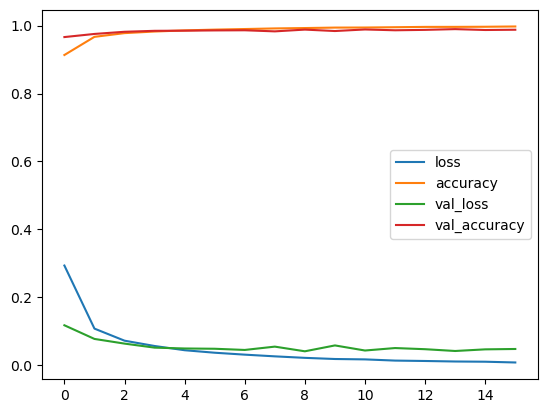

In [44]:
pd.DataFrame(history.history).plot()

In [45]:
ckpt_model = tf.keras.models.load_model(CKPT_path)
ckpt_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9861


[0.04321447014808655, 0.9861000180244446]

<font color = #B2A4FF size=5> The accuracy of the **CNN** model is **98.61 %** </font>

In [46]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

<font color = #FE0000 size = 10> *Thank You* </font>